In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Simulando dados de crescimento infantil (idade vs altura)
np.random.seed(42)

# Idades de 0 a 18 anos
idade = np.linspace(0, 18, 100)

# Curva de crescimento realista (não linear)
# Crescimento rápido no início, depois desacelera
altura_real = 50 + 15 * np.sqrt(idade) + 8 * np.log(idade + 1) + np.random.normal(0, 2, 100)

# Criando DataFrame
df = pd.DataFrame({
    'idade': idade,
    'altura': altura_real
})

print("Dados de crescimento infantil:")
print(df.head(10))
print(f"\nFaixa de idades: {idade.min():.1f} a {idade.max():.1f} anos")
print(f"Faixa de alturas: {altura_real.min():.1f} a {altura_real.max():.1f} cm")

Dados de crescimento infantil:
      idade     altura
0  0.000000  50.993428
1  0.181818  57.455926
2  0.363636  62.821957
3  0.545455  67.606838
4  0.727273  66.696086
5  0.909091  69.006682
6  1.090909  74.726206
7  1.272727  75.024996
8  1.454545  74.335265
9  1.636364  78.028389

Faixa de idades: 0.0 a 18.0 anos
Faixa de alturas: 51.0 a 136.9 cm


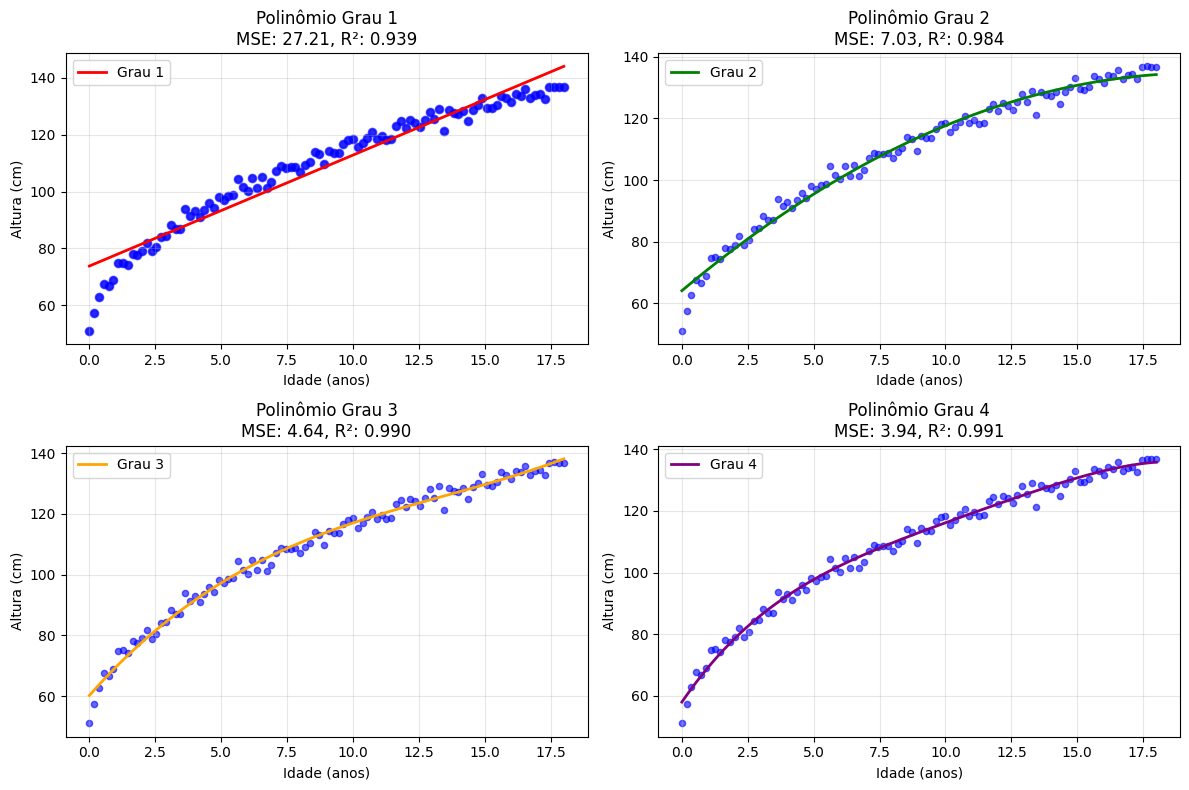

In [2]:
# Visualizando os dados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(idade, altura_real, alpha=0.6, color='blue')
plt.xlabel('Idade (anos)')
plt.ylabel('Altura (cm)')
plt.title('Dados de Crescimento Infantil')
plt.grid(True, alpha=0.3)

# Preparando dados para modelagem
X = idade.reshape(-1, 1)
y = altura_real

# Testando diferentes graus de polinômio
graus = [1, 2, 3, 4]
cores = ['red', 'green', 'orange', 'purple']

for i, grau in enumerate(graus):
    plt.subplot(2, 2, i+1)
    
    # Criando o modelo polinomial
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=grau)),
        ('linear', LinearRegression())
    ])
    
    # Treinando o modelo
    poly_model.fit(X, y)
    
    # Predições
    y_pred = poly_model.predict(X)
    
    # Plotando
    plt.scatter(idade, altura_real, alpha=0.6, color='blue', s=20)
    plt.plot(idade, y_pred, color=cores[i], linewidth=2, 
             label=f'Grau {grau}')
    
    # Métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    plt.xlabel('Idade (anos)')
    plt.ylabel('Altura (cm)')
    plt.title(f'Polinômio Grau {grau}\nMSE: {mse:.2f}, R²: {r2:.3f}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
# Análise detalhada do melhor modelo
print("=== ANÁLISE COMPARATIVA DOS MODELOS ===\n")

resultados = []

for grau in range(1, 8):
    # Modelo polinomial
    poly_model = Pipeline([
        ('poly', PolynomialFeatures(degree=grau)),
        ('linear', LinearRegression())
    ])
    
    poly_model.fit(X, y)
    y_pred = poly_model.predict(X)
    
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    resultados.append({
        'Grau': grau,
        'MSE': mse,
        'R²': r2,
        'Complexidade': grau
    })
    
    print(f"Grau {grau}: MSE = {mse:.3f}, R² = {r2:.3f}")

# Criando DataFrame dos resultados
df_resultados = pd.DataFrame(resultados)
print("\n=== RESUMO DOS RESULTADOS ===")
print(df_resultados)

=== ANÁLISE COMPARATIVA DOS MODELOS ===

Grau 1: MSE = 27.213, R² = 0.939
Grau 2: MSE = 7.028, R² = 0.984
Grau 3: MSE = 4.636, R² = 0.990
Grau 4: MSE = 3.936, R² = 0.991
Grau 5: MSE = 3.579, R² = 0.992
Grau 6: MSE = 3.438, R² = 0.992
Grau 7: MSE = 3.325, R² = 0.993

=== RESUMO DOS RESULTADOS ===
   Grau        MSE        R²  Complexidade
0     1  27.212781  0.938968             1
1     2   7.028220  0.984237             2
2     3   4.636129  0.989602             3
3     4   3.935943  0.991173             4
4     5   3.578600  0.991974             5
5     6   3.437822  0.992290             6
6     7   3.325080  0.992543             7


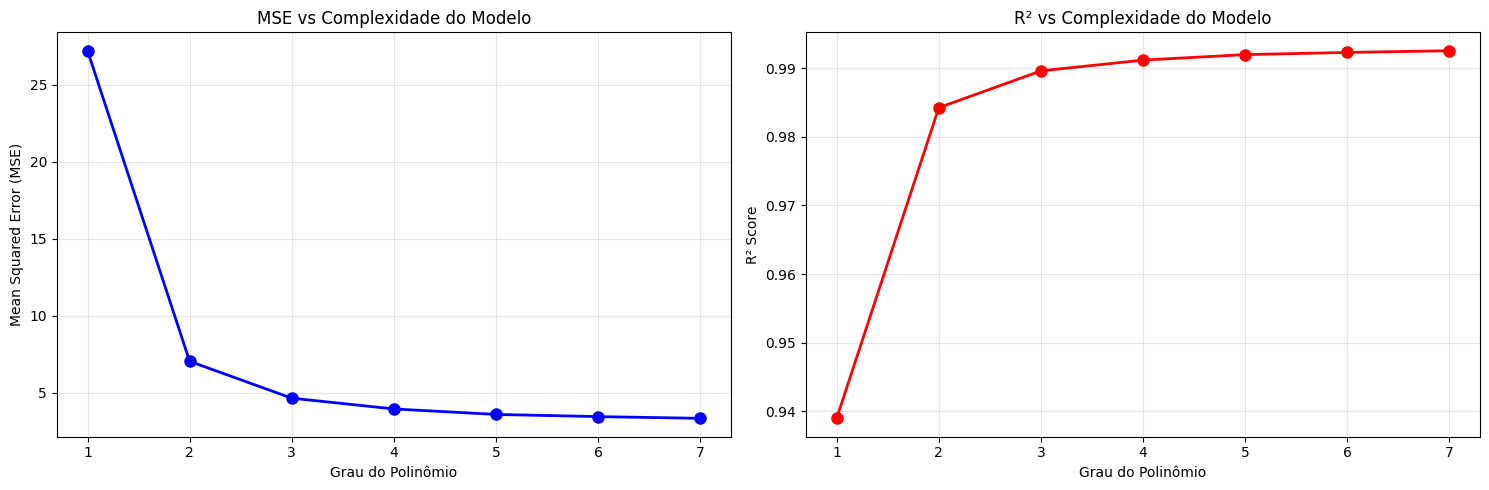


🎯 MELHOR MODELO: Polinômio de grau 7
R² = 0.993
MSE = 3.325


In [4]:
# Visualizando as métricas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# MSE vs Grau do polinômio
ax1.plot(df_resultados['Grau'], df_resultados['MSE'], 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Grau do Polinômio')
ax1.set_ylabel('Mean Squared Error (MSE)')
ax1.set_title('MSE vs Complexidade do Modelo')
ax1.grid(True, alpha=0.3)

# R² vs Grau do polinômio
ax2.plot(df_resultados['Grau'], df_resultados['R²'], 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Grau do Polinômio')
ax2.set_ylabel('R² Score')
ax2.set_title('R² vs Complexidade do Modelo')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identificando o melhor modelo
melhor_modelo_idx = df_resultados['R²'].idxmax()
melhor_grau = df_resultados.loc[melhor_modelo_idx, 'Grau']

print(f"\n🎯 MELHOR MODELO: Polinômio de grau {melhor_grau}")
print(f"R² = {df_resultados.loc[melhor_modelo_idx, 'R²']:.3f}")
print(f"MSE = {df_resultados.loc[melhor_modelo_idx, 'MSE']:.3f}")

=== MODELO FINAL PARA APLICAÇÃO CLÍNICA ===

PREDIÇÕES PARA CASOS CLÍNICOS:
----------------------------------------
Criança de  2 anos: 80.0 cm
Criança de  5 anos: 96.8 cm
Criança de  8 anos: 109.9 cm
Criança de 12 anos: 122.5 cm
Criança de 16 anos: 132.5 cm


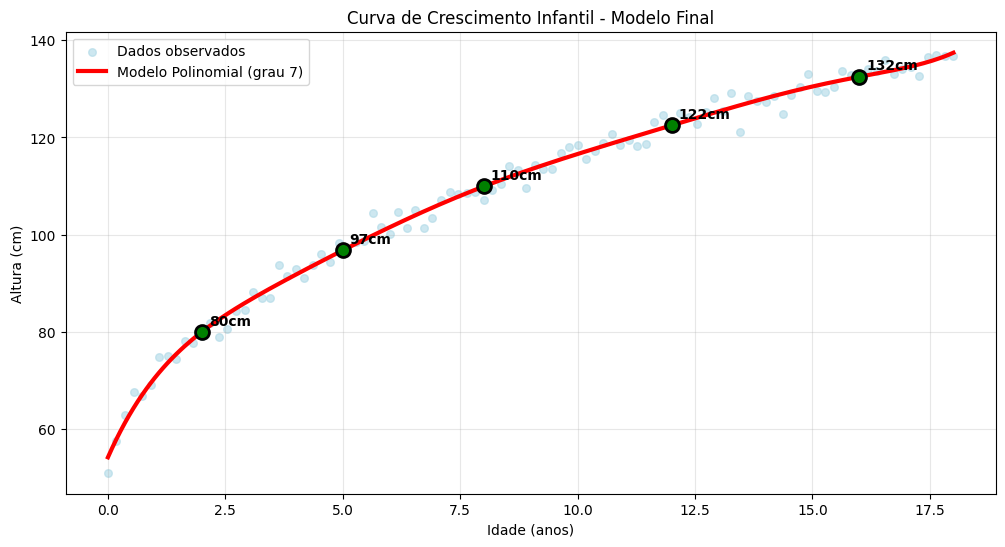


📊 O modelo polinomial de grau 7 captura adequadamente
a curva de crescimento não-linear típica do desenvolvimento infantil.


In [5]:
# Modelo final e predições
print("=== MODELO FINAL PARA APLICAÇÃO CLÍNICA ===\n")

# Treinando o melhor modelo
modelo_final = Pipeline([
    ('poly', PolynomialFeatures(degree=melhor_grau)),
    ('linear', LinearRegression())
])

modelo_final.fit(X, y)

# Função para predição clínica
def prever_altura(idade_crianca):
    """
    Prevê a altura esperada para uma criança de determinada idade
    """
    idade_array = np.array([[idade_crianca]])
    altura_prevista = modelo_final.predict(idade_array)[0]
    return altura_prevista

# Testando com alguns casos clínicos
casos_clinicos = [2, 5, 8, 12, 16]

print("PREDIÇÕES PARA CASOS CLÍNICOS:")
print("-" * 40)
for idade_caso in casos_clinicos:
    altura_pred = prever_altura(idade_caso)
    print(f"Criança de {idade_caso:2d} anos: {altura_pred:.1f} cm")

# Visualização final
plt.figure(figsize=(12, 6))

# Dados originais
plt.scatter(idade, altura_real, alpha=0.6, color='lightblue', 
           s=30, label='Dados observados')

# Curva do modelo final
idade_suave = np.linspace(0, 18, 200)
X_suave = idade_suave.reshape(-1, 1)
y_pred_suave = modelo_final.predict(X_suave)

plt.plot(idade_suave, y_pred_suave, color='red', linewidth=3, 
         label=f'Modelo Polinomial (grau {melhor_grau})')

# Marcando casos clínicos
for idade_caso in casos_clinicos:
    altura_caso = prever_altura(idade_caso)
    plt.plot(idade_caso, altura_caso, 'go', markersize=10, 
             markeredgecolor='black', markeredgewidth=2)
    plt.annotate(f'{altura_caso:.0f}cm', 
                xy=(idade_caso, altura_caso),
                xytext=(5, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

plt.xlabel('Idade (anos)')
plt.ylabel('Altura (cm)')
plt.title('Curva de Crescimento Infantil - Modelo Final')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n📊 O modelo polinomial de grau {melhor_grau} captura adequadamente")
print("a curva de crescimento não-linear típica do desenvolvimento infantil.")